Librarys

In [9]:
import pandas as pd 
from statsmodels import datasets as sm

In [10]:
dados=sm.get_rdataset('EuStockMarkets').data
dados

URLError: <urlopen error _ssl.c:983: The handshake operation timed out>

In [17]:
import pandas as pd
from statsmodels.datasets import get_rdataset

dados = get_rdataset('EuStockMarkets').data
print(dados.head())

URLError: <urlopen error _ssl.c:983: The handshake operation timed out>

In [82]:
import yfinance as yf

start_date = "2022-01-01"
end_date = "2024-11-25"
lista=['^GDAXI','^FCHI','^SSMI','^FTSE']
# Obtendo os dados de todos os índices
dados = yf.download(lista, start=start_date, end=end_date)['Adj Close'].dropna()

dados.columns=['DAX', 'CAC', 'SMI', 'FTSE']
dados=dados.rename_axis('date',axis=0)
dados


[*********************100%***********************]  4 of 4 completed


,DAX,CAC,SMI,FTSE
date,,,,
2022-01-04,7317.410156,7505.200195,16152.610352,12900.969727
2022-01-05,7376.370117,7516.899902,16271.750000,12906.370117
2022-01-06,7249.660156,7450.399902,16052.030273,12792.280273
2022-01-07,7219.479980,7485.299805,15947.740234,12797.940430
2022-01-10,7115.770020,7445.299805,15768.269531,12597.349609
...,...,...,...,...
2024-11-18,7278.229980,8109.299805,19189.189453,11639.599609
2024-11-19,7229.640137,8099.000000,19060.310547,11541.429688
2024-11-20,7198.450195,8085.100098,19004.779297,11539.639648


In [58]:
if dados['DAX'].pct_change().mean() > 0:
    dados['result']='Positive'
elif dados['DAX'].pct_change().mean() == 0:
    dados['result']='Neutral'
else:
    dados['result']='Negative'
    
dados        

,DAX,CAC,SMI,FTSE,result
date,,,,,
2022-01-04,7317.410156,7505.200195,16152.610352,12900.969727,Positive
2022-01-05,7376.370117,7516.899902,16271.750000,12906.370117,Positive
2022-01-06,7249.660156,7450.399902,16052.030273,12792.280273,Positive
2022-01-07,7219.479980,7485.299805,15947.740234,12797.940430,Positive
2022-01-10,7115.770020,7445.299805,15768.269531,12597.349609,Positive
...,...,...,...,...,...
2024-11-18,7278.229980,8109.299805,19189.189453,11639.599609,Positive
2024-11-19,7229.640137,8099.000000,19060.310547,11541.429688,Positive
2024-11-20,7198.450195,8085.100098,19004.779297,11539.639648,Positive


In [78]:

result=dados.pct_change().dropna()
result_acumulado=(result +1 ).cumprod()-1  
print(f' O retorno acumulado é {result_acumulado.iloc[-1]}%')

 O retorno acumulado é DAX    -0.008528
CAC     0.100850
SMI     0.196252
FTSE   -0.091812
Name: 2024-11-22 00:00:00, dtype: float64%


In [86]:
def normalizado(data):
    data_min=data.min()
    return (data - data_min) / (data.max()-data_min)

In [80]:
for coluna in dados.columns:
    dados[coluna]=normalizado(dados[coluna])
dados    

,DAX,CAC,SMI,FTSE
date,,,,
2022-01-04,0.640056,0.419239,0.543759,0.998094
2022-01-05,0.663059,0.426463,0.559269,1.000000
2022-01-06,0.613623,0.385404,0.530666,0.959739
2022-01-07,0.601848,0.406952,0.517090,0.961736
2022-01-10,0.561386,0.382255,0.493727,0.890950
...,...,...,...,...
2024-11-18,0.624770,0.792233,0.939054,0.552970
2024-11-19,0.605812,0.785873,0.922276,0.518327
2024-11-20,0.593644,0.777291,0.915047,0.517695


<Axes: xlabel='date'>

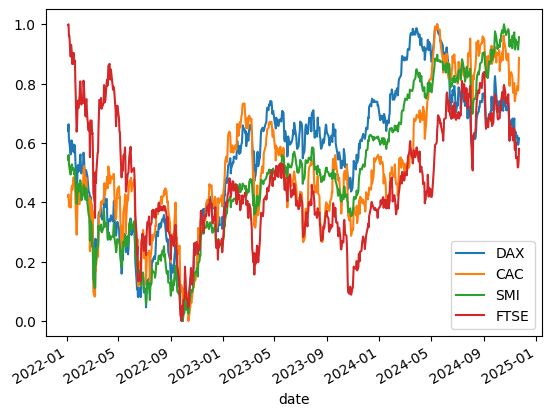

In [90]:
#usando o Map no lugar do for
df=pd.DataFrame(map(lambda data : normalizado(dados[data]),dados.columns)).T
df.plot()
